In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

/Users/shijianzhong/anaconda/envs/py36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


##### Library:

In [2]:
# component analysis
def component(li):
    for item in li:
        if item == '':
            item = 'NaN'
    
    dic = {}
    for item in li:
        if item in dic:
            dic[item] = dic[item] + 1
        else:
            dic[item] = 1
               
    keys = []
    values = []
    
    for key, value in dic.items():
        keys.append(key)
        values.append(value)
    
    
    keys = np.array(keys)
    values = np.array(values)
    
    index = np.argsort(-values)
    keys = keys[index]
    values = values[index]
    
    total = sum(values)
    count = 0
    for i in range(np.size(keys)):
        count = count + values[i]
        print(keys[i],'portion:',values[i]/total,'cumulate:',count/total)
               
    return keys, values

##### Read dataset:

In [3]:
df = pd.read_csv("../data_for_student_case.csv")
df.head()
#- bookingdate: only relevant for Chargebacks. Time stamp when the chargeback was reported. During simulation you may only use this knowledge after this date. So for example if on an email address a transaction ended in a chargeback, you can only block that email address after the booking date of the chargeback.
#- issuercountrycode: country where the card was issued
#- txvariantcode: the card type that was used (subbrand of visa or master card)
#- bin: card issuer identifier
#- amount/currencycode: transaction amount in minor units (so 100 EUR = 100 euro cent)
#- shoppercountrycode: IP address country
#- shopperinteraction: Ecommerce if it was an online transaction, ContAuth if it was a (monthly) subscription
#- simple_journal: Payment status. Authorised = “transaction approved and no fraud reported”, Refused = “transaction was declined, can be fraud, but can also be insufficient funds, etc”, Chargeback = “transaction was approved, but turned out to be fraud”
#- cardverificationresponsesupplied: did the shopper provide his 3 digit CVC/CVV2 code?
#- cvcresponsecode: Validation result of the CVC/CVV2 code: 0 = Unknown, 1=Match, 2=No Match, 3-6=Not checked
#- creationdate: Date of transaction
#- accountcode: merchant’s webshop
#- mail_id: Email address
#- ip_id: Ip address
#- card_id: Card number

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,64800.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,44900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,149900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,109900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,89900.0,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271


numercial features: amount  
time features: bookingdate, creationdate  
id features: mail_id, ip_id, card_id  
categorical features: others(9)

##### Labels: 

In [6]:
journal = df['simple_journal'].value_counts()
journal
component(df['txvariantcode'])

visadebit portion: 0.594361909485 cumulate: 0.594361909485
mccredit portion: 0.219424757733 cumulate: 0.813786667218
mcdebit portion: 0.0574381332176 cumulate: 0.871224800435
visaclassic portion: 0.0561536183372 cumulate: 0.927378418773
visaplatinum portion: 0.0348678637106 cumulate: 0.962246282483
visagold portion: 0.0225392758504 cumulate: 0.984785558334
visa portion: 0.00695291030436 cumulate: 0.991738468638
visabusiness portion: 0.00354705181451 cumulate: 0.995285520452
visasignature portion: 0.00213167482833 cumulate: 0.997417195281
visacorporate portion: 0.00144981438243 cumulate: 0.998867009663
mc portion: 0.000575104517498 cumulate: 0.999442114181
visapurchasing portion: 0.00042013623434 cumulate: 0.999862250415
electron portion: 9.29809698948e-05 cumulate: 0.999955231385
vpay portion: 2.41061773801e-05 cumulate: 0.999979337562
cirrus portion: 2.06624377544e-05 cumulate: 1.0


(array(['visadebit', 'mccredit', 'mcdebit', 'visaclassic', 'visaplatinum',
        'visagold', 'visa', 'visabusiness', 'visasignature',
        'visacorporate', 'mc', 'visapurchasing', 'electron', 'vpay',
        'cirrus'], 
       dtype='<U14'),
 array([172592,  63717,  16679,  16306,  10125,   6545,   2019,   1030,
           619,    421,    167,    122,     27,      7,      6]))

##### change currency

In [15]:
df['amount'].ix[df['currencycode'] == 'MXN'] = df['amount'].ix[df['currencycode'] == 'MXN'] * 0.052131
df['amount'].ix[df['currencycode'] == 'AUD'] = df['amount'].ix[df['currencycode'] == 'AUD'] * 0.7349
df['amount'].ix[df['currencycode'] == 'NZD'] = df['amount'].ix[df['currencycode'] == 'NZD'] * 0.68966
df['amount'].ix[df['currencycode'] == 'GBP'] = df['amount'].ix[df['currencycode'] == 'GBP'] * 1.292625
df['amount'].ix[df['currencycode'] == 'SEK'] = df['amount'].ix[df['currencycode'] == 'SEK'] * 0.112851


/Users/shijianzhong/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
df.head()

,txid,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,simple_journal,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id
0,1,2015-11-09 14:26:51,MX,mccredit,530056.0,3378.0888,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798
1,2,2015-11-09 14:27:38,MX,mccredit,547046.0,2340.6819,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595
2,3,2015-11-23 16:34:16,MX,mccredit,528843.0,7814.4369,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142
3,4,2015-11-23 16:34:51,MX,mccredit,547146.0,5729.1969,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-03 07:53:37,MexicoAccount,email47409,ip113648,card181744
4,5,2015-11-09 14:26:08,MX,visaclassic,477291.0,4686.5769,MXN,MX,Ecommerce,Chargeback,True,0,2015-07-08 18:35:35,MexicoAccount,email205501,ip83553,card97271


Here we consider 'Chargeback' as positive and 'Settled' as negative. 'Refuse' here means unlabeled. 

##### Amount: 

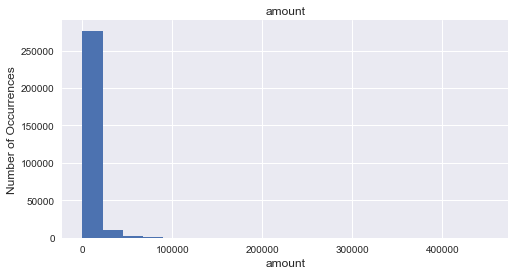

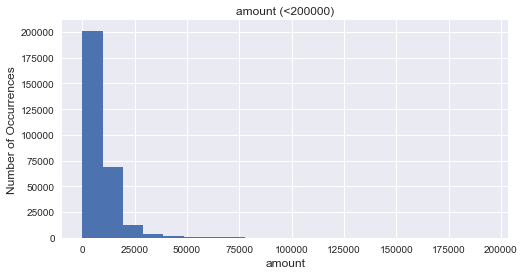

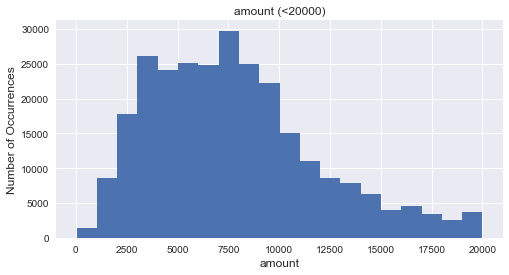

In [16]:
amount = df['amount']
plt.figure(figsize=(8,4))
plt.hist(amount.values, bins=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('amount', fontsize=12)
plt.title('amount')
plt.show()

amount_20w = df['amount'].ix[df['amount']<=200000]
plt.figure(figsize=(8,4))
plt.hist(amount_20w.values, bins=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('amount', fontsize=12)
plt.title('amount (<200000)')
plt.show()

amount_2w = df['amount'].ix[df['amount']<=20000]
plt.figure(figsize=(8,4))
plt.hist(amount_2w.values, bins=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('amount', fontsize=12)
plt.title('amount (<20000)')
plt.show()

We can see the amount skew significantly to left. 
Now let 's see how they vary through labels. 

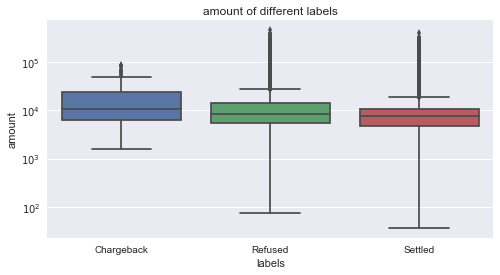

In [17]:
plt.figure(figsize=(8,4))
g = sns.boxplot(x='simple_journal', y='amount', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.xlabel('labels')
plt.ylabel('amount')
plt.title('amount of different labels')
plt.show()

We can find that positive seems to have larger amount than negative. 

##### creation date

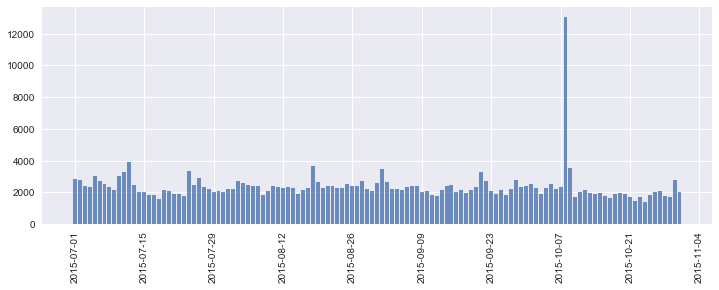

In [7]:
df['creationdate'] = pd.to_datetime(df['creationdate'])
cd = df['creationdate'].dt.date.value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cd.index, cd.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

The creation date mainly distributed in 2015-07 ~ 2016-3. Also, there is obvious periodicity by week.  
Now let 's go deeper with month, weekday and hour. 

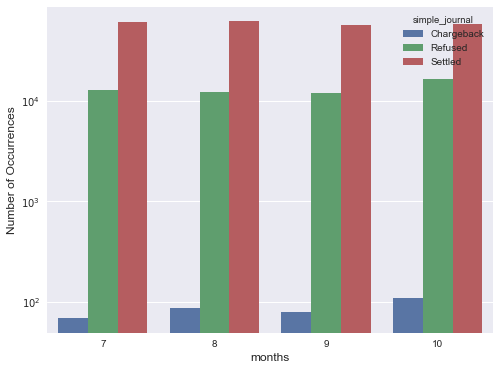

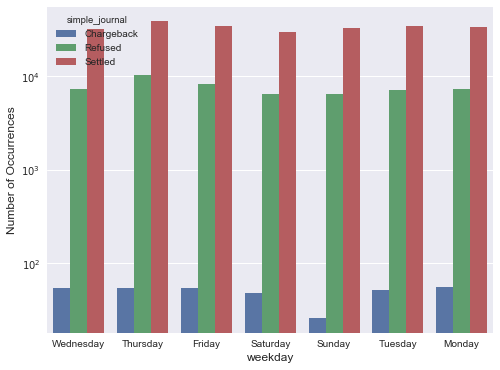

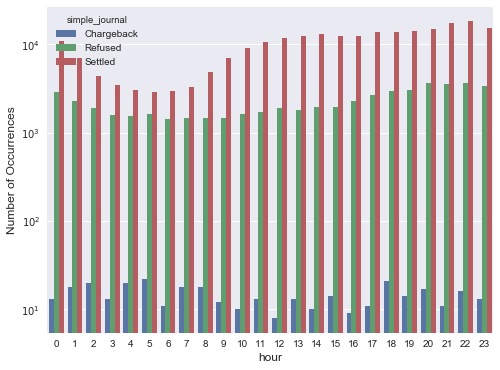

In [8]:
df['cmonth'] = df['creationdate'].dt.month
df['cweekday'] = df['creationdate'].dt.weekday_name
df['chour'] = df['creationdate'].dt.hour

plt.figure(figsize=(8,6))
g = sns.countplot(x='cmonth', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('months', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
g = sns.countplot(x='cweekday', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('weekday', fontsize=12)
plt.show()

plt.figure(figsize=(8,6))
g = sns.countplot(x='chour', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('hour', fontsize=12)
plt.show()

Seems there is no significant differences through month, weekday and hour. Maybe there are less fraud in Sundays?  
Now let 's go for categorical features.

##### issuercountrycode  
The idea here is to maintain majority(maybe 95%) of the classes, and classify the minority(5%) as 'others'. 

In [9]:
component(df['issuercountrycode'].values)

GB portion: 0.690676419337 cumulate: 0.690676419337
AU portion: 0.0866789263797 cumulate: 0.777355345717
MX portion: 0.0846608949591 cumulate: 0.862016240676
SE portion: 0.0822674959192 cumulate: 0.944283736595
NZ portion: 0.0172324730872 cumulate: 0.961516209682
US portion: 0.0141434386429 cumulate: 0.975659648325
CN portion: 0.00589912597888 cumulate: 0.981558774304
nan portion: 0.00169776363549 cumulate: 0.98325653794
SA portion: 0.000867822385685 cumulate: 0.984124360325
KR portion: 0.000864378646059 cumulate: 0.984988738971
HK portion: 0.000712854102527 cumulate: 0.985701593074
TH portion: 0.00070252288365 cumulate: 0.986404115958
CA portion: 0.000681860445895 cumulate: 0.987085976403
AE portion: 0.000626760611884 cumulate: 0.987712737015
NG portion: 0.000557885819369 cumulate: 0.988270622835
LB portion: 0.000544110860866 cumulate: 0.988814733696
NO portion: 0.000523448423112 cumulate: 0.989338182119
BG portion: 0.000502785985357 cumulate: 0.989840968104
IE portion: 0.000451129890

(array(['GB', 'AU', 'MX', 'SE', 'NZ', 'US', 'CN', 'nan', 'SA', 'KR', 'HK',
        'TH', 'CA', 'AE', 'NG', 'LB', 'NO', 'BG', 'IE', 'VN', 'FR', 'DE',
        'NL', 'SG', 'ES', 'KW', 'IN', 'EG', 'MY', 'CY', 'PT', 'BR', 'FI',
        'RU', 'JP', 'RO', 'ZA', 'CH', 'AR', 'GR', 'QA', 'IT', 'TR', 'PH',
        'TW', 'CO', 'PL', 'DK', 'KZ', 'ID', 'LT', 'UA', 'IL', 'IS', 'LY',
        'BH', 'CL', 'PK', 'JO', 'BE', 'LV', 'EC', 'SI', 'GH', 'HU', 'SK',
        'KE', 'MT', 'AZ', 'LU', 'MO', 'RS', 'PA', 'GE', 'LK', 'AO', 'AT',
        'BM', 'PE', 'GI', 'AL', 'HR', 'OM', 'UY', 'BN', 'MU', 'TZ', 'ZM',
        'MK', 'BS', 'HN', 'BD', 'ZW', 'VG', 'EE', 'BB', 'TT', 'VE', 'BA',
        'ZZ', 'MN', 'PR', 'LA', 'SV', 'BW', 'AD', 'GT', 'KY', 'CM', 'BF',
        'DO', 'FJ', 'BO', 'BZ', 'IQ', 'CK', 'KH', 'MV', 'CD', 'BJ', 'CG',
        'CV', 'CZ', 'DZ', 'BY', 'SB', 'ME', 'TM', 'PY', 'AI', 'AM', 'CW',
        'MD', 'SL', 'CR', 'TJ', 'JM'], 
       dtype='<U3'),
 array([200560,  25170,  24584,  23889,   5004,   

Here we selected GB, AU, MX, SE, NZ(96%). 

In [10]:
issuercountrycode_filter = set(['GB', 'AU', 'MX', 'SE', 'NZ', 'US', 'CN'])
df['issuercountrycode'].ix[df['issuercountrycode'].isin(issuercountrycode_filter) == False] = 'other'

/Users/shijianzhong/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
component(df['issuercountrycode'].values)

GB portion: 0.690676419337 cumulate: 0.690676419337
AU portion: 0.0866789263797 cumulate: 0.777355345717
MX portion: 0.0846608949591 cumulate: 0.862016240676
SE portion: 0.0822674959192 cumulate: 0.944283736595
other portion: 0.0184412256958 cumulate: 0.962724962291
NZ portion: 0.0172324730872 cumulate: 0.979957435378
US portion: 0.0141434386429 cumulate: 0.994100874021
CN portion: 0.00589912597888 cumulate: 1.0


(array(['GB', 'AU', 'MX', 'SE', 'other', 'NZ', 'US', 'CN'], 
       dtype='<U5'),
 array([200560,  25170,  24584,  23889,   5355,   5004,   4107,   1713]))

Now visualize:

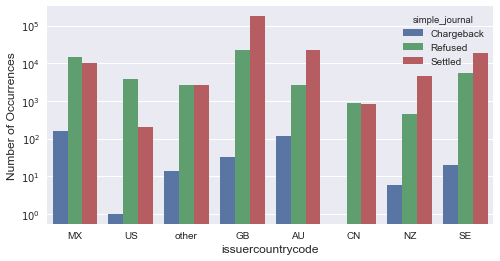

In [12]:
plt.figure(figsize=(8,4))
g = sns.countplot(x='issuercountrycode', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('issuercountrycode', fontsize=12)
plt.show()

issuercountrycode can be significant  
Then let 's go through other categorical features with the same method:

##### txvariantcode

/Users/shijianzhong/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


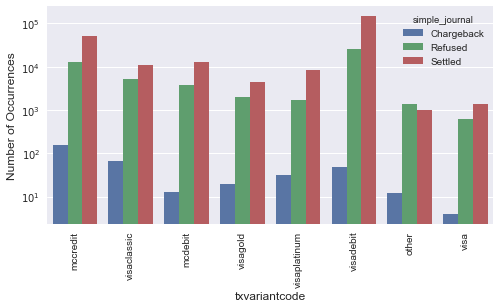

In [13]:
txvariantcode_filter = set(['visadebit', 'mccredit', 'mcdebit', 'visaclassic', 'visaplatinum', 'visagold', 'visa'])
df['txvariantcode'].ix[df['txvariantcode'].isin(txvariantcode_filter) == False] = 'other'
plt.figure(figsize=(8,4))
g = sns.countplot(x='txvariantcode', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('txvariantcode', fontsize=12)
plt.xticks(rotation=90)
plt.show()

##### currencycode

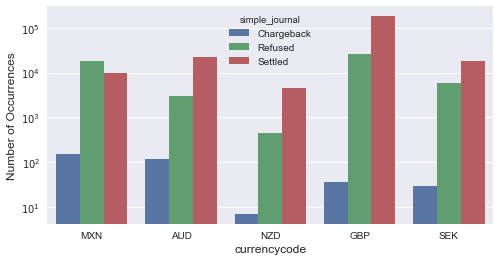

In [15]:
plt.figure(figsize=(8,4))
g = sns.countplot(x='currencycode', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('txvariantcode', fontsize=12)
#plt.xticks(rotation=90)
plt.show()

##### shoppercountrycode

/Users/shijianzhong/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


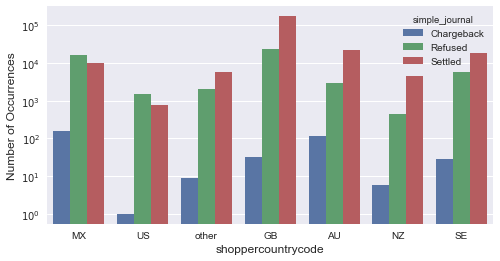

In [18]:
shoppercountrycode_filter = set(['GB', 'MX', 'AU', 'SE', 'NZ', 'US'])
df['shoppercountrycode'].ix[df['shoppercountrycode'].isin(shoppercountrycode_filter) == False] = 'other'

plt.figure(figsize=(8,4))
g = sns.countplot(x='shoppercountrycode', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('shoppercountrycode', fontsize=12)
plt.show()

##### shopperinteraction

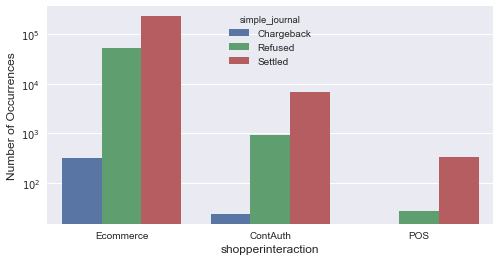

In [20]:
plt.figure(figsize=(8,4))
g = sns.countplot(x='shopperinteraction', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('shopperinteraction', fontsize=12)
plt.show()

##### cardverificationcodesupplied

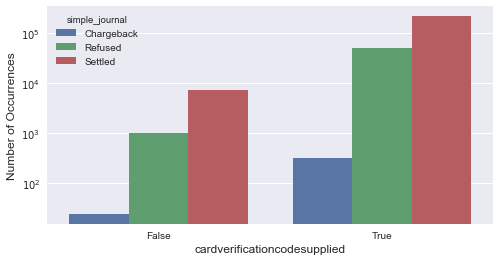

In [21]:
plt.figure(figsize=(8,4))
g = sns.countplot(x='cardverificationcodesupplied', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('cardverificationcodesupplied', fontsize=12)
plt.show()

##### cvcresponsecode

/Users/shijianzhong/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


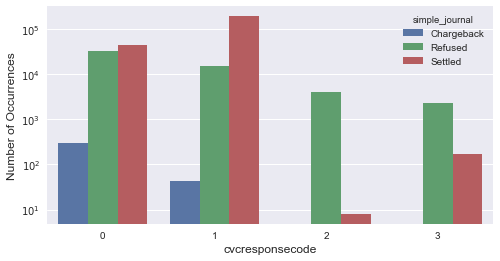

In [22]:
df['cvcresponsecode'].ix[df['cvcresponsecode']>3] = 3

plt.figure(figsize=(8,4))
g = sns.countplot(x='cvcresponsecode', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('cvcresponsecode', fontsize=12)
plt.show()

##### accountcode

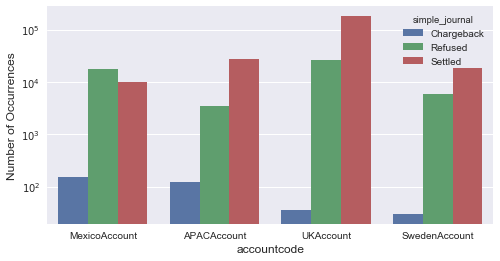

In [23]:
plt.figure(figsize=(8,4))
g = sns.countplot(x='accountcode', hue='simple_journal', data=df)
g.figure.get_axes()[0].set_yscale('log')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('accountcode', fontsize=12)
plt.show()

Now let 's go for id features.  
Example idea of using id features can be check the frequency of transactions in one id. A frequent user is assumed to be more reliable. 